In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 32.3 MB/s 
     |████████████████████████████████| 6.8 MB 47.0 MB/s 
     |████████████████████████████████| 167 kB 71.4 MB/s 
     |████████████████████████████████| 1.3 MB 52.8 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 113 kB 55.1 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.2 MB/s 
     |████████████████████████████████| 1.7 MB 52.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 45.1 MB/s 
     |████████████████████████████████| 15.5 MB 46.2 MB/s 
     |████████████████████████████████| 596 kB 60.0 MB/s 
     |████████████████████████████████| 62 kB 641 kB/s 
     |████████████████████████████████| 102 kB 10.3 MB/s 
     |██████████████████

In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from pycaret.classification import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.metrics import roc_curve , auc

**Import Data**

In [137]:
data=pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [138]:
data1=data.copy()

In [139]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [134]:
data.nunique()

CreditScore           460
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Geography_France        2
Geography_Germany       2
Geography_Spain         2
Gender_Female           2
Gender_Male             2
Exited                  2
dtype: int64

In [135]:
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
Exited               0
dtype: int64

In [140]:
data.drop(['RowNumber', 'Surname','CustomerId'], axis=1, inplace=True)

In [141]:
data=pd.get_dummies(data,columns=["Geography"])

In [142]:
data=pd.get_dummies(data,columns=["Gender"])

In [143]:
cols=list(data.columns.values)
cols.pop(cols.index('Exited'))
data=data[cols+['Exited']]

In [12]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


In [144]:
data.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
Exited                 int64
dtype: object

**EDA**

In [145]:
data.groupby('Exited')[['Gender_Male','Gender_Female','Geography_France','Geography_Spain','Geography_Germany']].sum()

,Gender_Male,Gender_Female,Geography_France,Geography_Spain,Geography_Germany
Exited,,,,,
0,4559.0,3404.0,4204.0,2064.0,1695.0
1,898.0,1139.0,810.0,413.0,814.0


In [146]:
data.groupby('HasCrCard')[['Geography_France','Geography_Spain','Geography_Germany']].sum()

,Geography_France,Geography_Spain,Geography_Germany
HasCrCard,,,
0,1471.0,756.0,718.0
1,3543.0,1721.0,1791.0


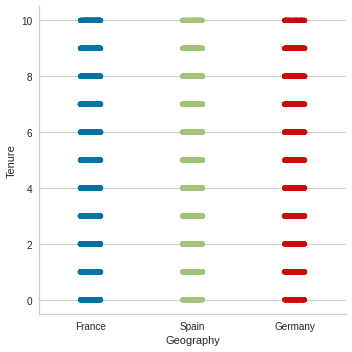

In [147]:
sns.catplot(x="Geography", y="Tenure", data=data1)

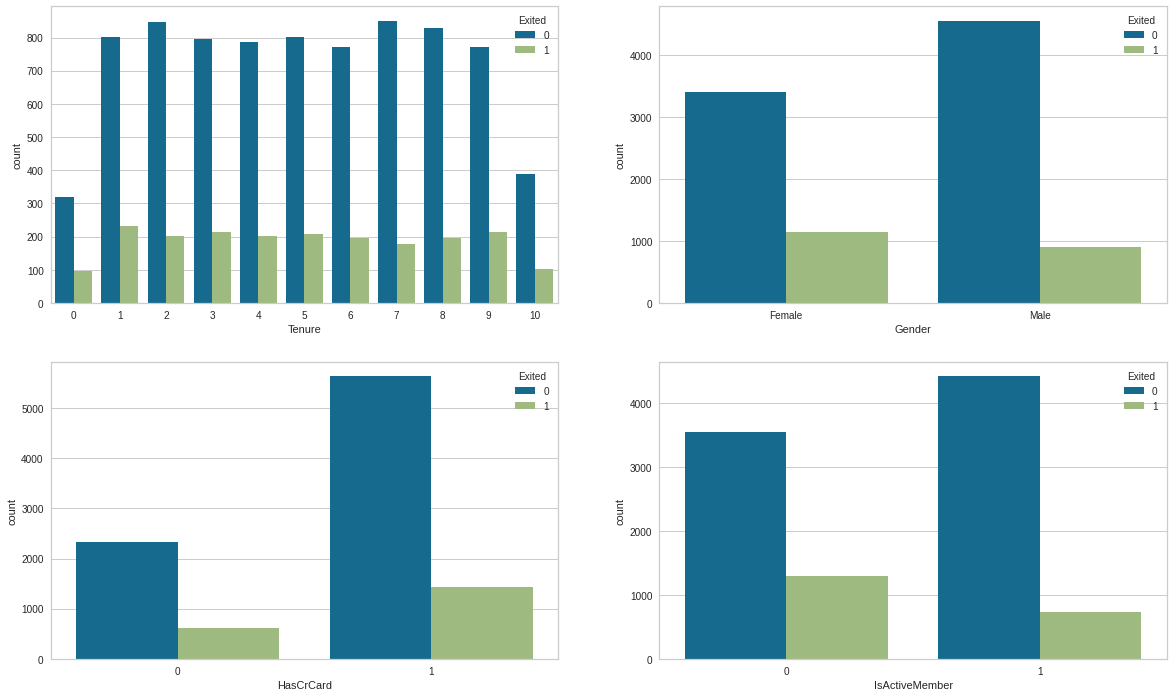

In [148]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Tenure', hue = 'Exited',data = data1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data1, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data1, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data1, ax=axarr[1][1]);

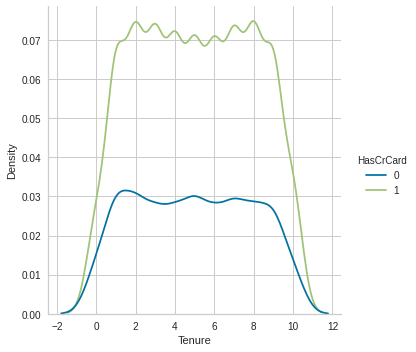

In [149]:
sns.displot(data1, x="Tenure", hue="HasCrCard" , kind="kde")

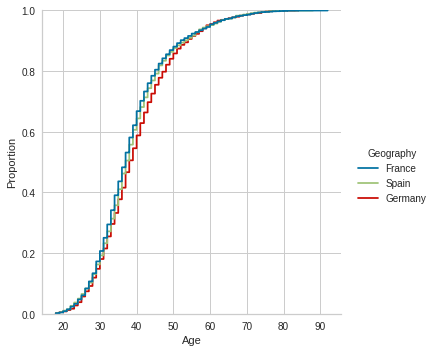

In [150]:
sns.displot(data1, x="Age", hue="Geography", kind="ecdf")

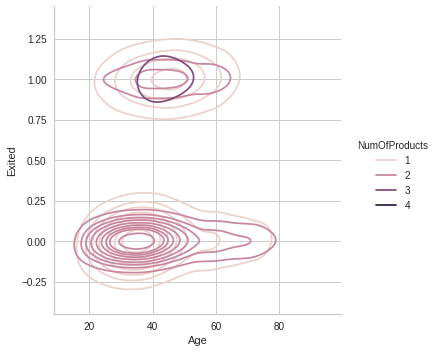

In [151]:
sns.displot(data1, x="Age", y="Exited", hue="NumOfProducts", kind="kde")

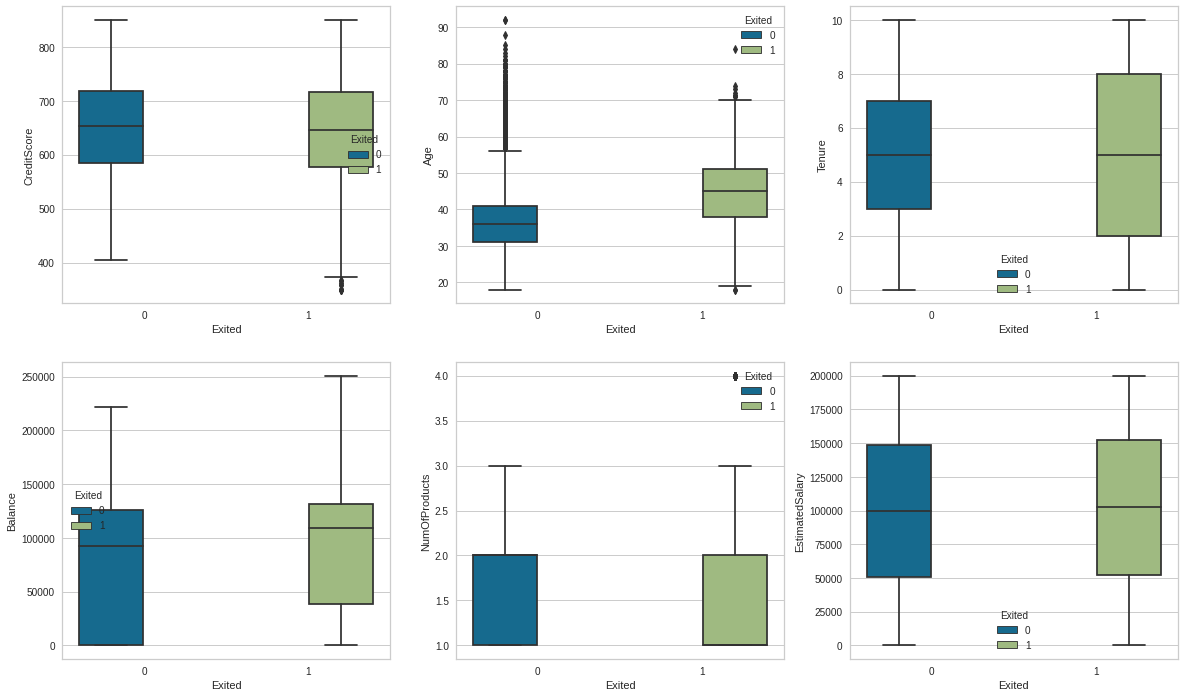

In [152]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data1, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data1 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data1, ax=axarr[0][2])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data1, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data1, ax=axarr[1][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data1, ax=axarr[1][2]);

In [153]:
corr = data.corr()

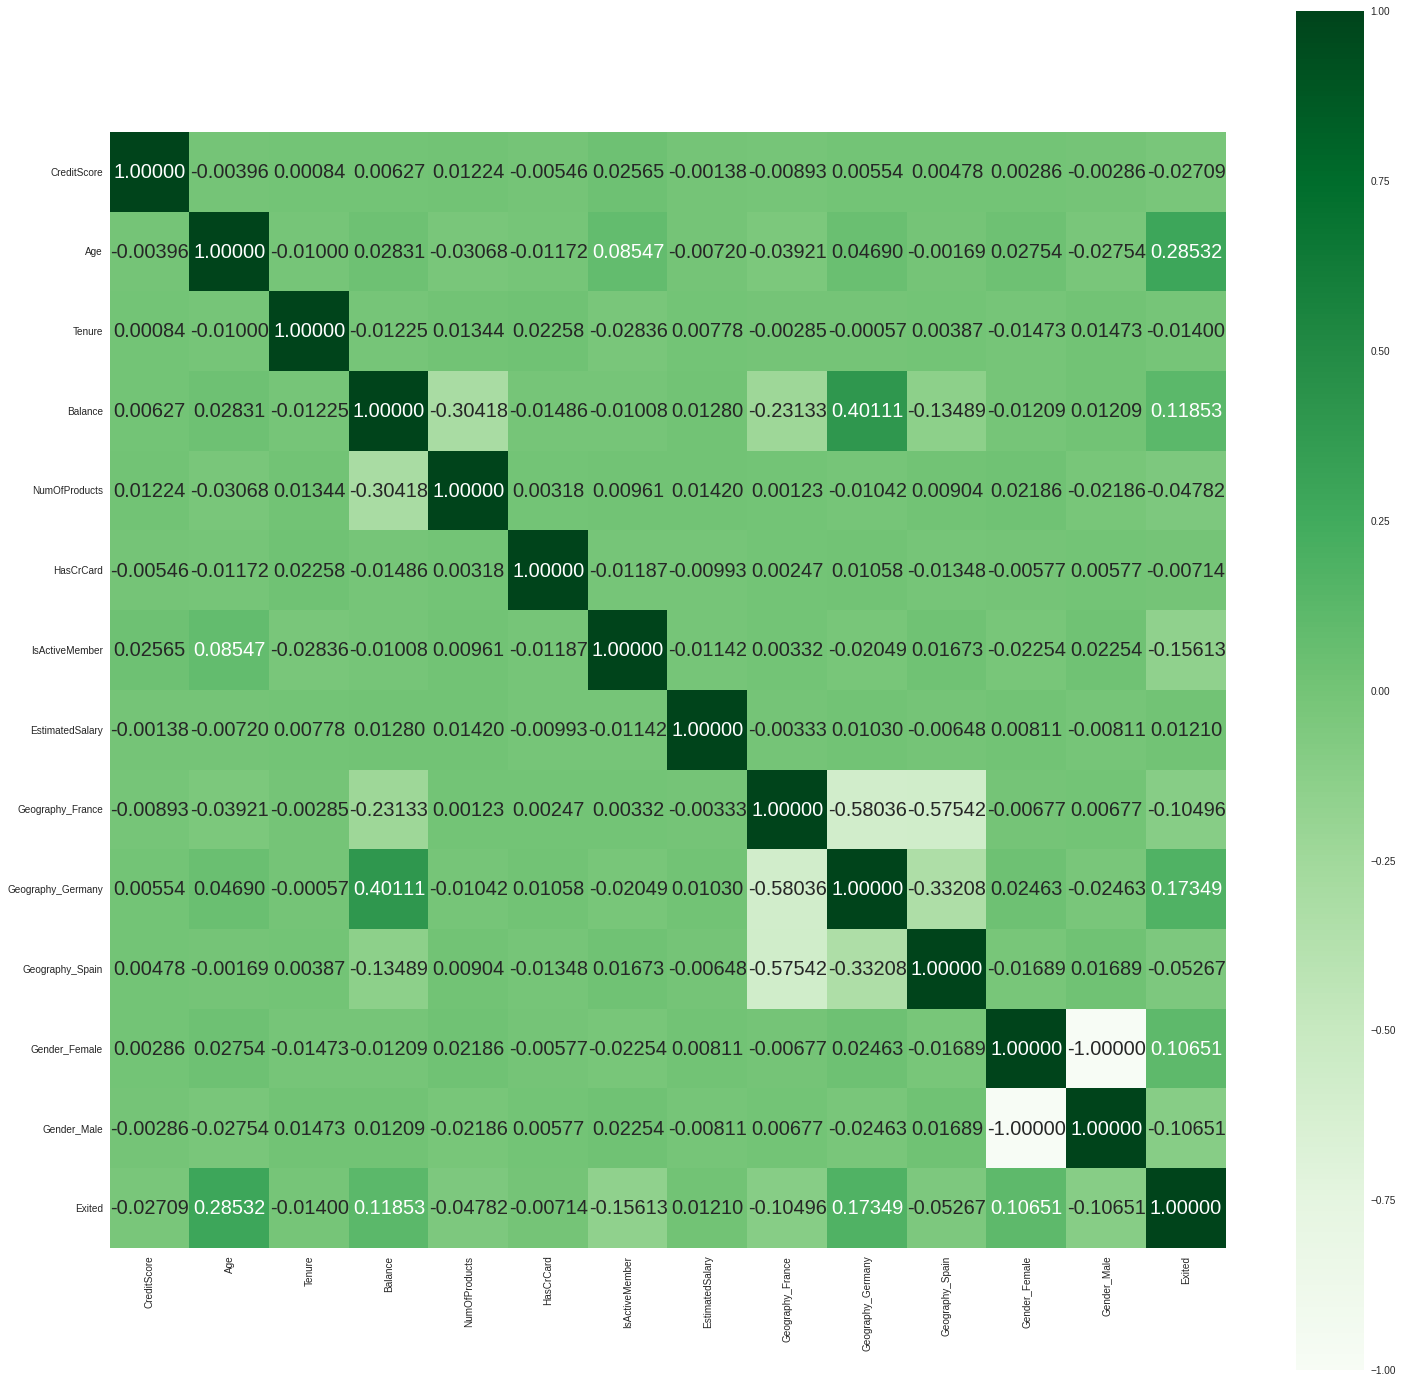

In [154]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.5f', annot=True, annot_kws={'size':20}, cmap='Greens')

*   Splitting data into train and test
*   Scaling features 

In [155]:
x = data.loc[:,['Age','Tenure','Geography_Germany','IsActiveMember','NumOfProducts','EstimatedSalary',]]
y = data['Exited']
print(x.shape , y.shape)

(10000, 6) (10000,)


In [156]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(7500, 6) (7500,)
(2500, 6) (2500,)


In [157]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**logistic Regression**

In [158]:
logis = LogisticRegression()
logis.fit(x_train, y_train)
y_pred = logis.predict(x_test)
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.8236


[[1960   58]
 [ 383   99]]


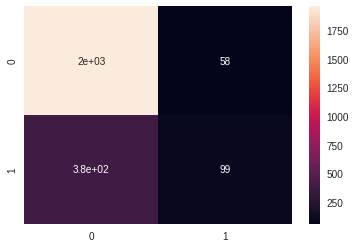

In [159]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2018
           1       0.63      0.21      0.31       482

    accuracy                           0.82      2500
   macro avg       0.73      0.59      0.60      2500
weighted avg       0.80      0.82      0.79      2500



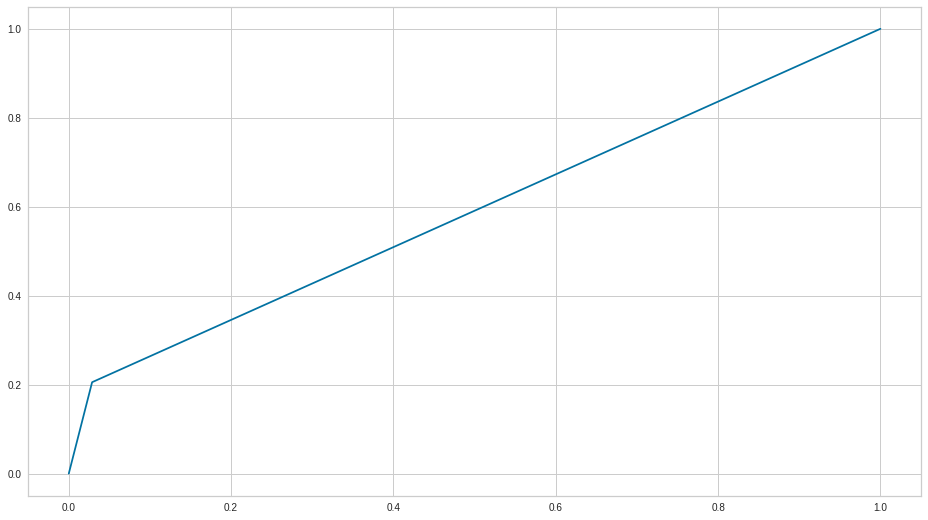

In [161]:
a,b,threshold = roc_curve(y_test,y_pred)
c = auc(a ,b)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(a ,b,label='logistic')

**KNN Classifier**

In [162]:
knn_class = KNeighborsClassifier()
parameters = [{'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21]}]
grid_search = GridSearchCV(estimator=knn_class , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Scores : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Scores : 0.1026882492726896
Best Parameter : {'n_neighbors': 17}


In [163]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train , y_train)
knn.fit(x_test,y_test)
predictions=knn.predict(x_train)
y_pred = knn.predict(x_test)
print('The accuracy of KNN is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of KNN is:  0.8596


[[1963   55]
 [ 296  186]]


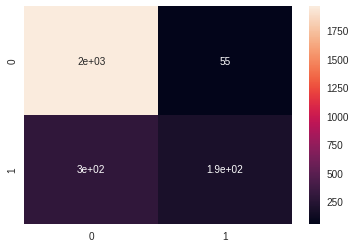

In [164]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2018
           1       0.77      0.39      0.51       482

    accuracy                           0.86      2500
   macro avg       0.82      0.68      0.72      2500
weighted avg       0.85      0.86      0.84      2500



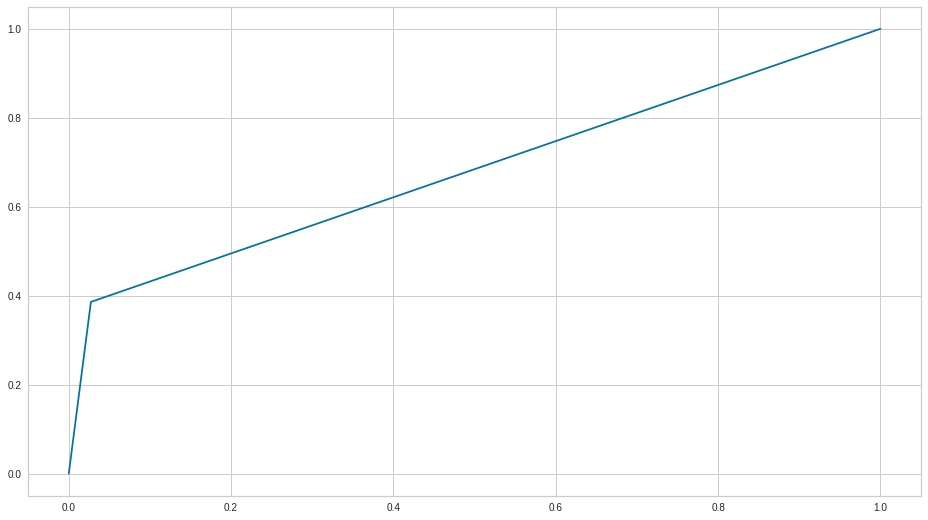

In [166]:
ak,bk,threshold = roc_curve(y_test,y_pred)
c = auc(ak ,bk)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ak ,bk)

**DecisionTree Classifier**

In [167]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy of the DecisionTree Model: ",accuracy)

Accuracy of the DecisionTree Model:  0.7936


[[1730  288]
 [ 228  254]]


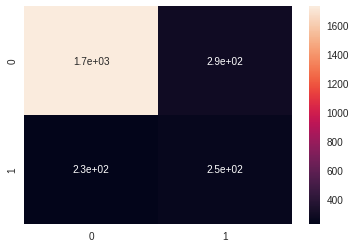

In [169]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2018
           1       0.47      0.53      0.50       482

    accuracy                           0.79      2500
   macro avg       0.68      0.69      0.68      2500
weighted avg       0.80      0.79      0.80      2500



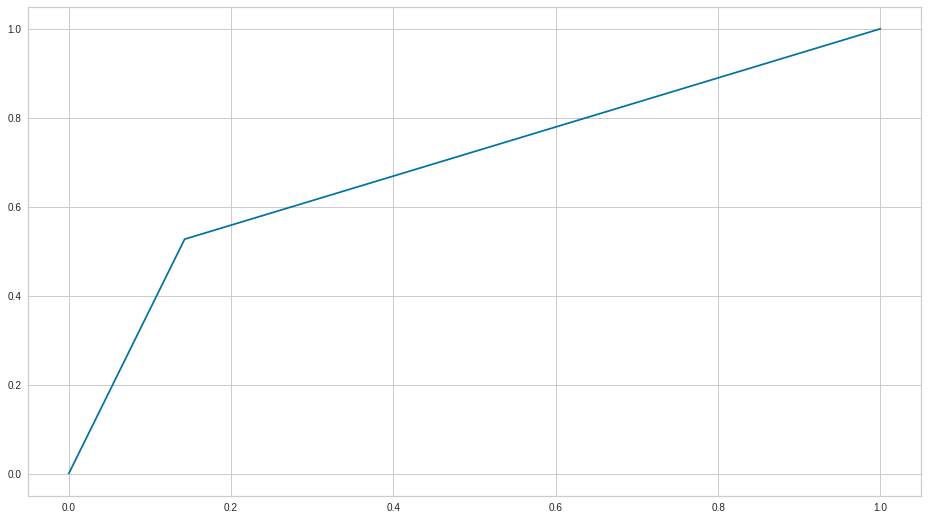

In [171]:
ad,bd,threshold = roc_curve(y_test,y_pred)
c = auc(ad ,bd)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ad ,bd)

**RandomForest** 

In [172]:
rf_class = RandomForestClassifier()
parameters = [{'n_estimators' : [100,150,200,300]}]
grid_search = GridSearchCV(estimator=rf_class , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Score : 0.0053628113400410625
Best Parameter : {'n_estimators': 150}


In [173]:
rfc = RandomForestClassifier(n_estimators=150 ,criterion = 'entropy', random_state = 42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy of the RandomForest Model: ",accuracy)

Accuracy of the RandomForest Model:  0.8472


[[1890  128]
 [ 254  228]]


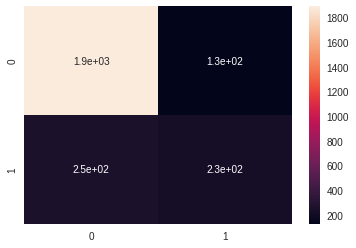

In [174]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2018
           1       0.64      0.47      0.54       482

    accuracy                           0.85      2500
   macro avg       0.76      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500



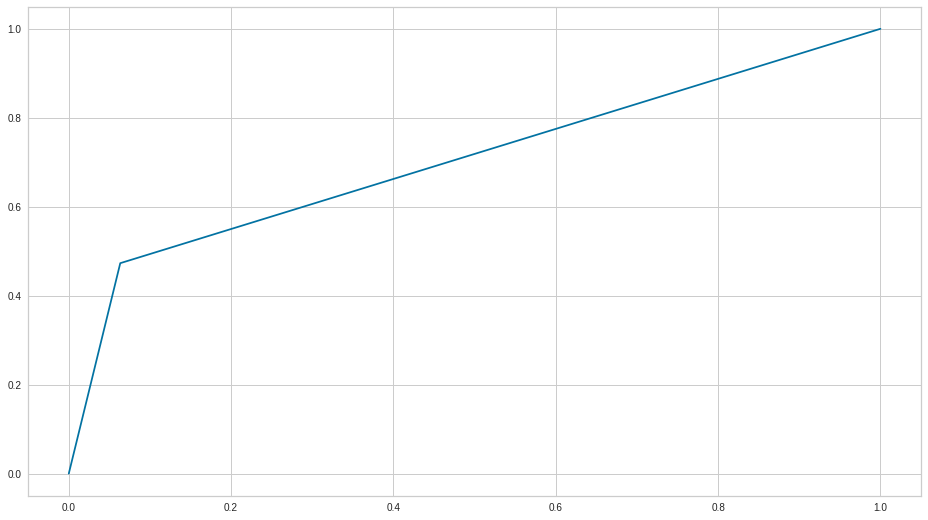

In [176]:
ar,br,threshold = roc_curve(y_test,y_pred)
c = auc(ar ,br)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ar ,br)

**XGBoost**

In [96]:
class_mod =xgb.XGBClassifier()
parameters = [{'n_estimators' : [50,100,200] , 'learning_rate' : [0.3,0.06,0.08] , 'gamma': [0.0,0.1, 0.2,] , 'max_depth':[6,7]}]
grid_search = GridSearchCV(estimator=class_mod , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Score : 0.1124084644008744
Best Parameter : {'gamma': 0.2, 'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 50}


In [177]:
xgb_class = xgb.XGBClassifier(
    n_estimators = 50,
    learning_rate = 0.06,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=6,
    gamma=.2,
)
xgb_class.fit(x_train , y_train)
y_pred = xgb_class.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy of the XGB Model: ",accuracy)

Accuracy of the XGB Model:  0.8656


[[1938   80]
 [ 256  226]]


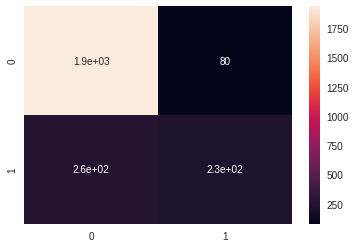

In [178]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2018
           1       0.74      0.47      0.57       482

    accuracy                           0.87      2500
   macro avg       0.81      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



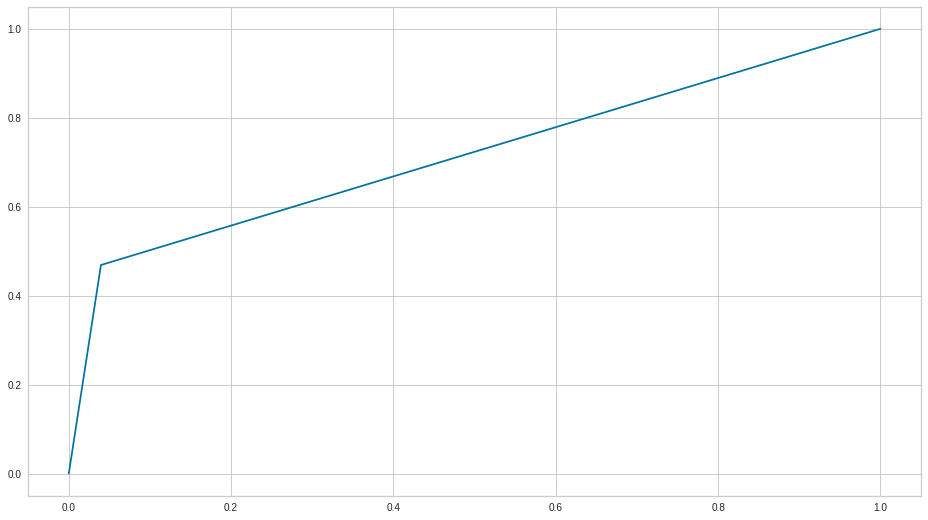

In [180]:
ag,bg,threshold = roc_curve(y_test,y_pred)
c = auc(ag ,bg)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ag ,bg)

**SVC**

In [104]:
svc_class = SVC()
parameters = [{'kernel' : ['linear','sigmoid','rbf']}]
grid_search = GridSearchCV(estimator=svc_class , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Score : 0.10589493084749262
Best Parameter : {'kernel': 'rbf'}


In [181]:
svc_class = SVC(kernel='rbf')
svc_class.fit(x_train,y_train)
y_pred=svc_class.predict(x_test)
print("Accuracy of the SVC Model: ",accuracy)

Accuracy of the SVC Model:  0.8656


[[1956   62]
 [ 281  201]]


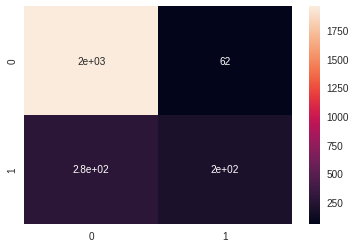

In [182]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2018
           1       0.76      0.42      0.54       482

    accuracy                           0.86      2500
   macro avg       0.82      0.69      0.73      2500
weighted avg       0.85      0.86      0.85      2500



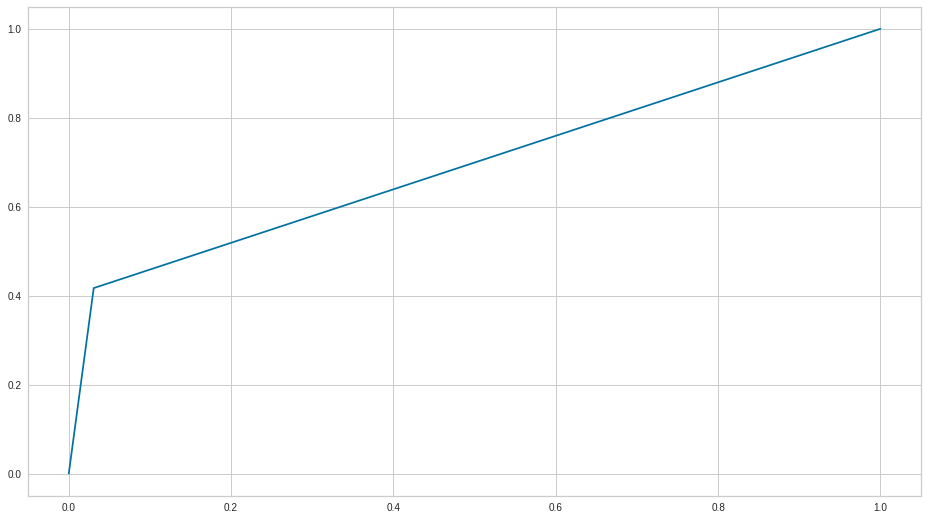

In [183]:
am,bm,threshold = roc_curve(y_test,y_pred)
c = auc(am ,bm)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(am ,bm)

**ANN**

In [184]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [185]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [186]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5853 - accuracy: 0.7132
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7932
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8040
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8097
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8192
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8212
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8264
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8307
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8381
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3834 - accura

[[1956   62]
 [ 281  201]]


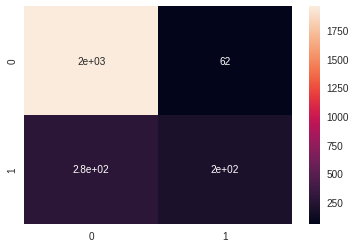

In [187]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [188]:
print("Accuracy of the SVC Model: ",accuracy)

Accuracy of the SVC Model:  0.8656


In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2018
           1       0.76      0.42      0.54       482

    accuracy                           0.86      2500
   macro avg       0.82      0.69      0.73      2500
weighted avg       0.85      0.86      0.85      2500



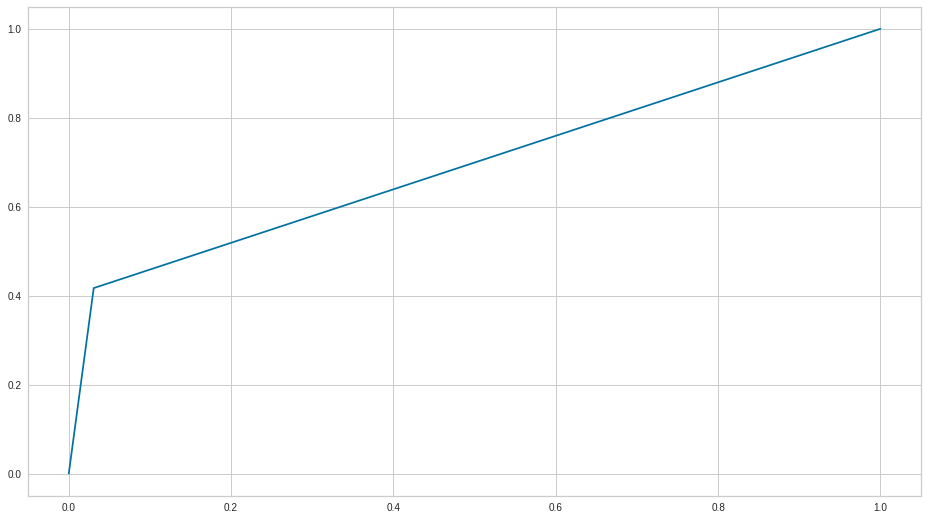

In [190]:
aa,ba,threshold = roc_curve(y_test,y_pred)
c = auc(aa ,ba)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(aa ,ba)

**Pycaret**

In [191]:
clf = setup(data, target = 'Exited')

,Description,Value
0,session_id,2114
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [192]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8633,0.8613,0.4574,0.7625,0.5713,0.4961,0.5192,0.844
rf,Random Forest Classifier,0.8606,0.8478,0.4474,0.7544,0.5602,0.4841,0.5080,0.991
lightgbm,Light Gradient Boosting Machine,0.8577,0.8489,0.4803,0.7144,0.5731,0.4918,0.5065,0.188
ada,Ada Boost Classifier,0.8531,0.8398,0.4502,0.7084,0.5498,0.4673,0.4848,0.315
et,Extra Trees Classifier,0.8488,0.8281,0.4438,0.6905,0.5388,0.4537,0.4703,0.866
lda,Linear Discriminant Analysis,0.8388,0.8288,0.3371,0.7012,0.4537,0.3729,0.4080,0.044
ridge,Ridge Classifier,0.8365,0.0000,0.2490,0.7869,0.3764,0.3110,0.3803,0.022
qda,Quadratic Discriminant Analysis,0.8004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.032
dummy,Dummy Classifier,0.8004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.019
lr,Logistic Regression,0.7940,0.6635,0.0508,0.3765,0.0892,0.0444,0.0737,0.195


In [193]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8743,0.8663,0.5108,0.7802,0.6174,0.5461,0.5636
1,0.8514,0.8548,0.4029,0.7273,0.5185,0.4391,0.4659
2,0.8614,0.8793,0.4643,0.7471,0.5727,0.4953,0.5153
3,0.8671,0.8615,0.4714,0.7765,0.5867,0.5131,0.5358
4,0.8714,0.8685,0.4857,0.7907,0.6018,0.5303,0.5527
5,0.8543,0.8489,0.4071,0.7500,0.5278,0.4504,0.4799
6,0.8643,0.8548,0.4571,0.7711,0.5740,0.4995,0.5236
7,0.8614,0.8729,0.4786,0.7363,0.5801,0.5015,0.5182
8,0.8529,0.8470,0.4286,0.7229,0.5381,0.4573,0.4795
9,0.8741,0.8590,0.4676,0.8228,0.5963,0.5284,0.5580


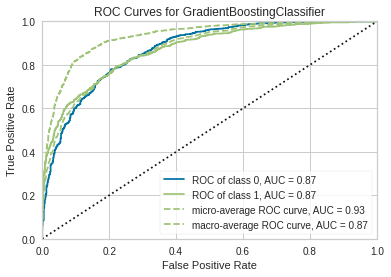

In [194]:
plot_model(estimator = gbc, plot = 'auc')

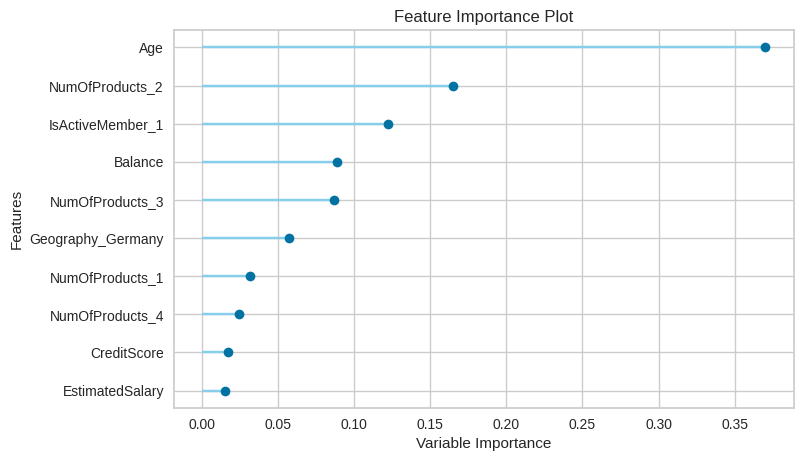

In [195]:
plot_model(estimator = gbc, plot = 'feature')